In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import  Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.isotonic import IsotonicRegression
from sklearn.pipeline import make_pipeline
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

from app.models import ExperimentResult

170


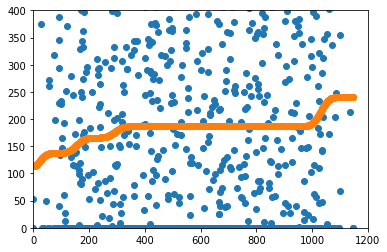

171


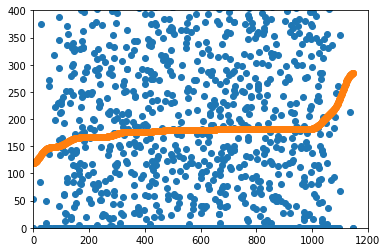

172


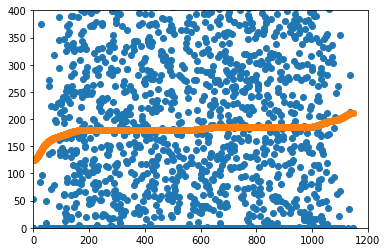

173


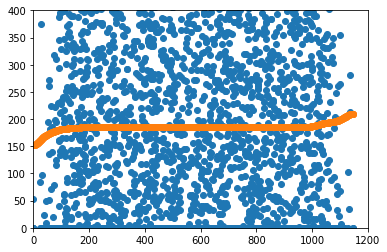

174


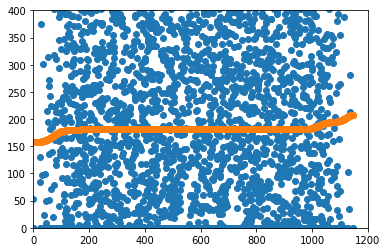

175


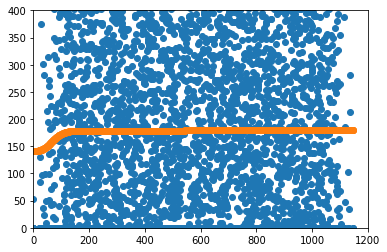

176


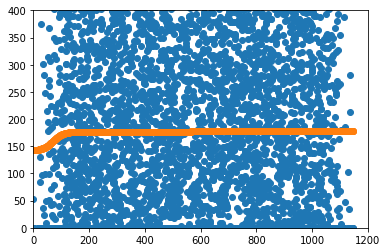

177


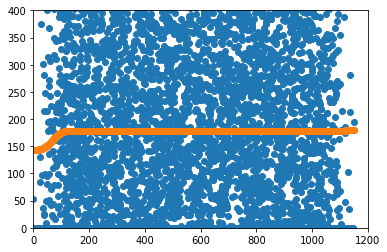

178


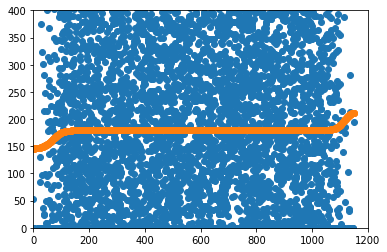

179


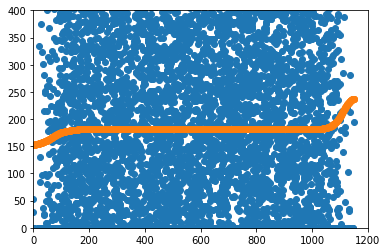

180


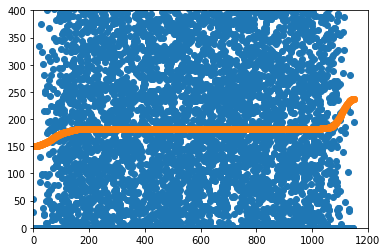

181


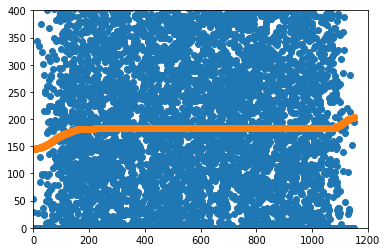

182


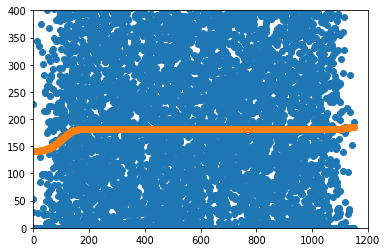

183


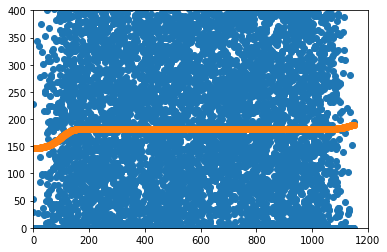

184


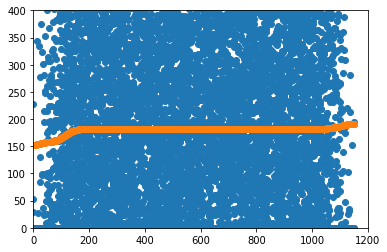

185


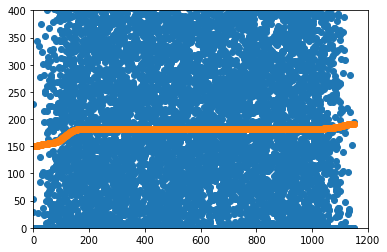

186


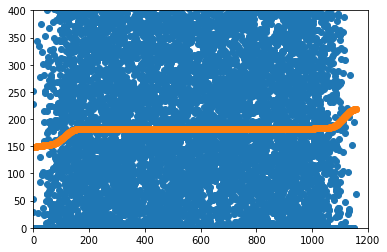

187


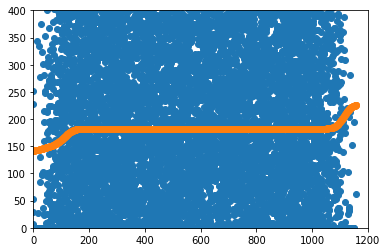

188


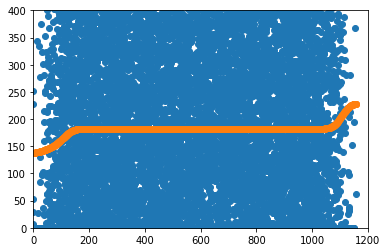

189


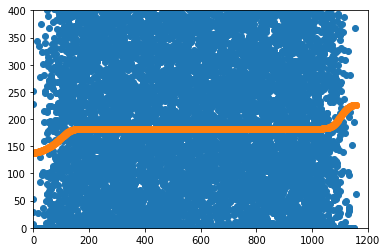

190


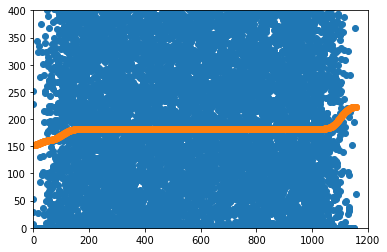

191


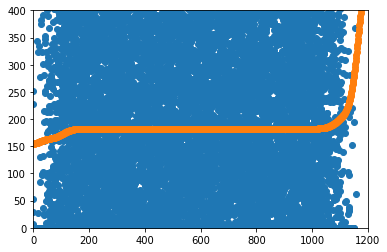

192


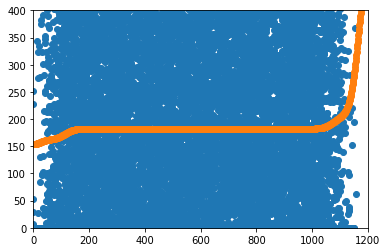

193


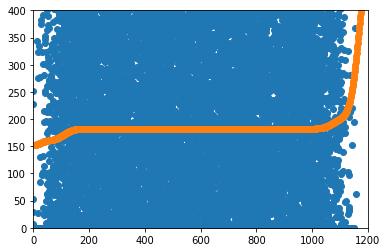

194


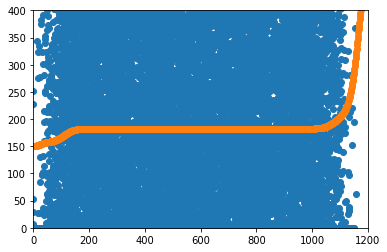

195


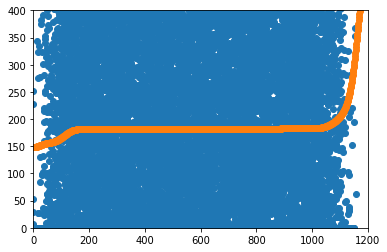

196


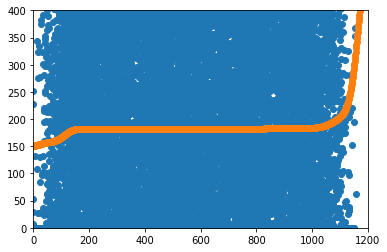

197


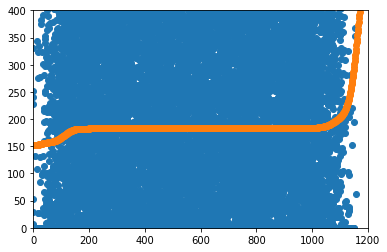

198


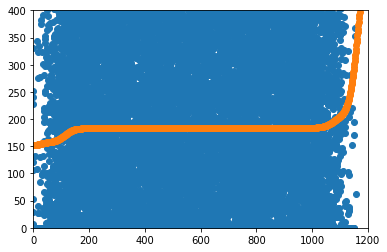

199


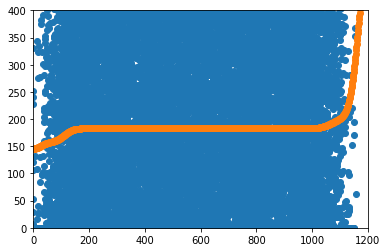

200


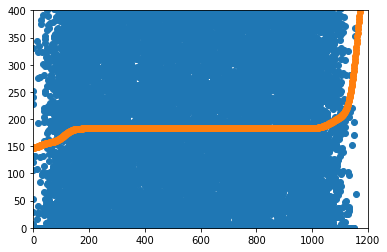

201


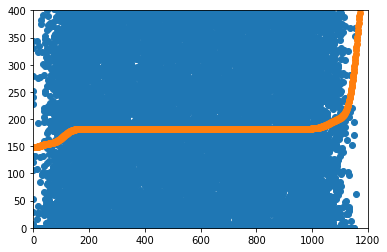

In [23]:
X = list()
Y = list()
for pk in range(170, 202):
    inst = ExperimentResult.objects.get(pk=pk)
    X.extend(inst.get_v())
    Y.extend(inst.get_i())
    n = 1000
    df = pd.DataFrame.from_dict({'i': Y, 'v': X})
    model = IsotonicRegression().fit(X, Y)
    X_ = np.linspace(df.v.min(), df.v.max(), n)
    mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_)})
    mdf.i = gaussian_filter(mdf.i, sigma=20)
    print(pk)
    plt.scatter(df.v, df.i)
    plt.scatter(mdf.v, mdf.i)
    plt.axis([0,1200,0,400])
    plt.show()

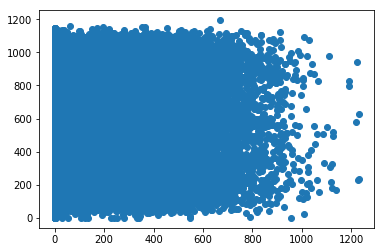

In [11]:
df = pd.DataFrame.from_dict({'i': X, 'v': Y})
plt.scatter(df.v, df.i)

In [7]:
X_ = df.v
Y_ = df.i

201


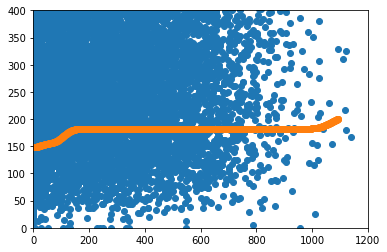

In [19]:
n = 1000
model = IsotonicRegression().fit(X, Y)
X_ = np.linspace(df.v.min(), df.v.max(), n)
mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_)})
mdf.i = gaussian_filter(mdf.i, sigma=20)
print(pk)
plt.scatter(df.v, df.i)
plt.scatter(mdf.v, mdf.i)
plt.axis([0,1200,0,400])
plt.show()